In [51]:

#libraries
import os 
import random 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from PIL import Image
from skimage import img_as_float 
from IPython.display import display
import pathlib

In [52]:
ROOT_PATH = os.path.dirname(os.path.abspath("__file__"))
DATA_DIR = ROOT_PATH + '/data/'

img_data = []

In [58]:
for f in os.listdir(DATA_DIR): 
    if f != '.DS_Store' or f != 'not_included':
        img_path = DATA_DIR + '/'
        img_data = [img_path + img for img in os.listdir(img_path)]
    

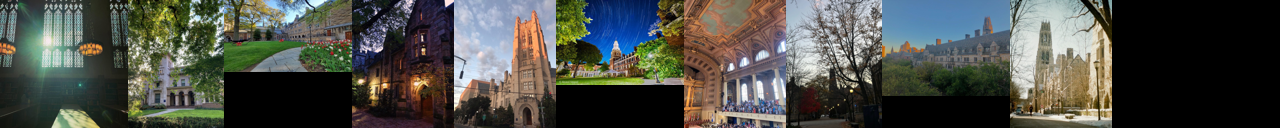

In [59]:
sample_size = 10
ims = [Image.open(x) for x in random.sample(img_data, sample_size)]
im_size = 128 
new_im = Image.new('RGB', (im_size*sample_size, im_size))
x_offset = 0 
for i in ims: 
    i.thumbnail((im_size, im_size))
    new_im.paste(i, (x_offset, 0))
    x_offset += i.size[0]

display(new_im) 

In [61]:
len(img_data)

409

# Image Augmentation

In [63]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import splitfolders

# Augment images
from PIL import Image
from torchvision import transforms
from torchvision.utils import save_image

ModuleNotFoundError: No module named 'splitfolders'

This did nothing for us. I just went through it manually
-  Removing duplicate images 

In [42]:
def load_image(path, size=(256,256)):
    """
    Convert image to float
    
    Input:
    path(str): Path to image file
    size(tuple): Resize image

    Output:
    (array): 256x256x3 image, all values float between 0 and 1
    """
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(size)
    return img_as_float(img)

In [43]:
def mse(img1, img2):
    err = np.sum((img1 - img2) ** 2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

In [45]:
img_list = img_data
mse_mat = np.full((len(img_list), len(img_list)), np.inf)


In [46]:
import numpy as np

images = [load_image(img_path) for img_path in img_list] # preload images 
images = np.array(images)  # Stack images into a single array

# Compute pairwise MSE in a vectorized manner
num_images = len(images)
mse_mat = np.zeros((num_images, num_images))

for i in range(num_images - 1):
    diffs = images[i] - images[i+1:]
    mse_values = np.mean(diffs**2, axis=(1, 2, 3))  # Assuming RGB images
    mse_mat[i, i+1:] = mse_values
    mse_mat[i+1:, i] = mse_values  # Symmetric


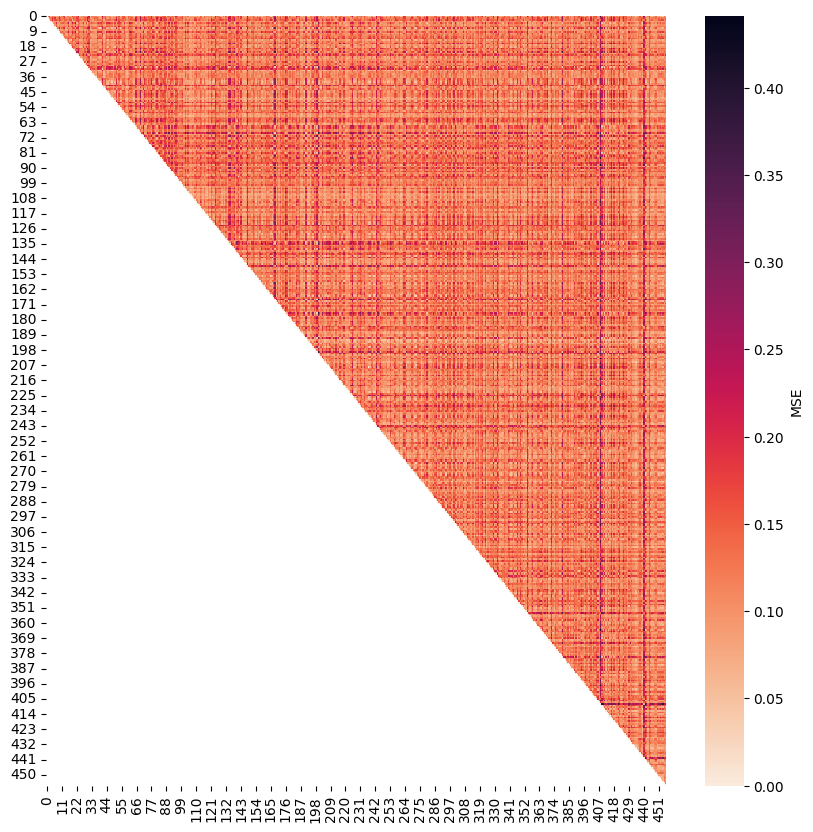

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = sns.heatmap(mse_mat, mask=np.tril(mse_mat), cmap=sns.cm.rocket_r)
cax.collections[0].colorbar.set_label("MSE")
plt.show()

This heatmap helps us compare the similarity between images. The MSE is about a dark orange color, meaning most of the images appear to be diverse. 

In [48]:
threshold = 0.001
dup_images = list(set(np.concatenate(np.where(mse_mat<threshold))))
print(f"Number images with duplicates: {len(dup_images)}")

Number images with duplicates: 457


Accidentally duplicated a whole folder. Getting rid of duplicates 

In [ ]:
for folder in os.listdir(DATA_DIR): 
    print(folder)
    if folder != '.DS_Store':
        img_path = DATA_DIR + folder + '/'
        img_data[folder] = [img_path + img for img in os.listdir(img_path)]
    

In [ ]:
all_images = sorted(os.listdir(DATA_DIR))

for idx in dup_images:
    for folder in ['yale_vibes', 'icloud_photos']: 
        dup_image_path = os.path 
        dup_image_path = os.path.join(DATA_DIR, all_images[idx])
        if os.path.exists(dup_image_path):
            os.remove(dup_image_path)
            print(f"Removed duplicate: {dup_image_path}")

Removed duplicate: /Users/linhpham/Desktop/class/EENG_439/EENG439-Final-Project/data/.DS_Store


PermissionError: [Errno 1] Operation not permitted: '/Users/linhpham/Desktop/class/EENG_439/EENG439-Final-Project/data/icloud_photos'